In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import datetime

from tqdm import tqdm

In [2]:
train = pd.read_csv('Train.csv')
train.drop(['id'], axis=1, inplace=True)
print(train.shape)
train.head()

(100000, 24)


,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,2011-1,616,0.0,4,43,2,0,30.0,1.0,1,...,0,0,0,0,0,0,0,0,0,1738000
1,2011-1,112,0.0,3,33,1,0,15.0,1.0,2,...,0,0,0,0,0,0,0,0,0,1169000
2,2011-1,230,NaN,9,34,1,0,25.0,NaN,4,...,0,0,0,0,0,0,0,0,0,2821000
3,2011-1,302,1.0,4,60,3,0,15.0,0.0,2,...,0,0,0,0,0,0,0,0,0,5714000
4,2011-1,578,0.0,3,49,2,0,30.0,NaN,2,...,0,0,0,0,0,0,0,0,0,1660000


In [3]:
train.describe()

,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,kw1,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,69817.000000,100000.000000,100000.000000,100000.000000,100000.000000,94943.000000,70133.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05
mean,334.636650,0.529857,5.375840,52.203780,2.113640,0.396600,21.919362,0.499793,2.518600,0.05757,...,0.00445,0.001560,0.001000,0.007370,0.007390,0.001980,0.000310,0.00151,0.000200,5.100166e+06
std,193.947919,0.582340,4.045109,17.559982,0.826155,0.552948,8.377479,0.500004,1.974278,0.23293,...,0.06656,0.039466,0.031607,0.085532,0.085647,0.044453,0.017604,0.03883,0.014141,4.228087e+06
min,0.000000,0.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.900000e+05
25%,166.000000,0.000000,2.000000,40.000000,1.000000,0.000000,15.000000,0.000000,1.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.583000e+06
50%,335.000000,0.000000,4.000000,52.000000,2.000000,0.000000,25.000000,0.000000,2.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,4.063000e+06
75%,503.000000,1.000000,7.000000,60.000000,3.000000,1.000000,30.000000,1.000000,4.000000,0.00000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.220250e+06
max,671.000000,2.000000,25.000000,217.000000,6.000000,2.000000,30.000000,1.000000,11.000000,1.00000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,8.363400e+07


## EDA

#### Посмотрим кол-во уникальных значений, которое принимает каждый из признаков (включая целевую переменную)

In [4]:
unique_values = pd.DataFrame(train.nunique().sort_values(ascending=False), columns=['Amount of unique values'])
unique_values

,Amount of unique values
price,14996
street_id,672
area,114
floor,25
date,18
n_photos,12
metro_dist,7
rooms,6
build_tech,3
balcon,3


#### Что интересного:  
    Параметр area принимает достаточно много значений. Скорее всего это размер квартиры в квадратных метрах;
    Видно, что дат, когда квартира была выставлена на продажу/продан не очень много. Полезно будет посмотреть зависимость цены квартиры от даты;
    n_photos - количество доступных фотографий квартиры (?). Не очень много, максимум 12.
    metro_dist - почему-то принимает всего 7 значений. Очень странно, Логичным бы было, если бы он был вещественным признаком с большим числом значений. Возможно происходит некоторое достаточно большое округление до этих 6 значений.
    Или, что более вероятно, это количество минут до метро с небольшим округлением.
    build_tech - принимает мало значений, не очень понятно, что это. Тип постройки квартиры?
    g_lift - наличие лифта в квартире?
    kw-признаки - бинарные признаки, обозначающие какие-то особенности квартиры. Возможно какие-то сильно влияют на цену.

#### Посмотрим, есть ли NaN'ы у каких-то признаков

In [5]:
nan_distribution = pd.DataFrame((round(train.isna().sum() * 100 / train.shape[0], 1))\
                                .sort_values(ascending=False).astype('str') + ' %', 
                                columns=['NaN Percentage'])
nan_distribution.head(10)

,NaN Percentage
build_tech,30.2 %
g_lift,29.9 %
metro_dist,5.1 %
price,0.0 %
kw13,0.0 %
street_id,0.0 %
floor,0.0 %
area,0.0 %
rooms,0.0 %
balcon,0.0 %


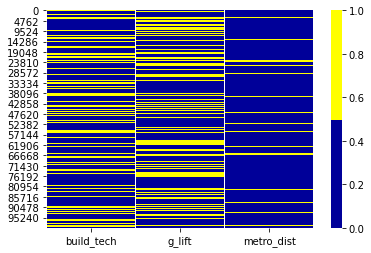

In [6]:
cols = ['build_tech', 'g_lift', 'metro_dist']

colours = ['#000099', '#ffff00'] 
sns.heatmap(train[cols].isnull(), cmap=sns.color_palette(colours))
plt.show()

#### Что интересного:
    В целом видно, что данные довольно чистые. Сильно выделяются два признака с 30 процентами пропусков. Это очень много. Если не удастся как-то эффективно подобрать замену NaN'ам, возможно их лучше удалить.
    metro_dist - 5% пропусков, не слишком много, но и не мало. Удалять этот признак точно нельзя, потому что обычно расстояние до метро сильно влияет на итоговую цену квартиры (предположение, еще проверим на графиках).

#### Распределение целевой переменной.
    Поскольку цена принимает очень большие значения, при этом разница между квартирами в большинстве случаев не будет очень сильно отличаться, график будет представлять из себя что-то вроде иглы. Чтобы более ясно представлять себе распределение цен, построим также график логарифмированной цены.

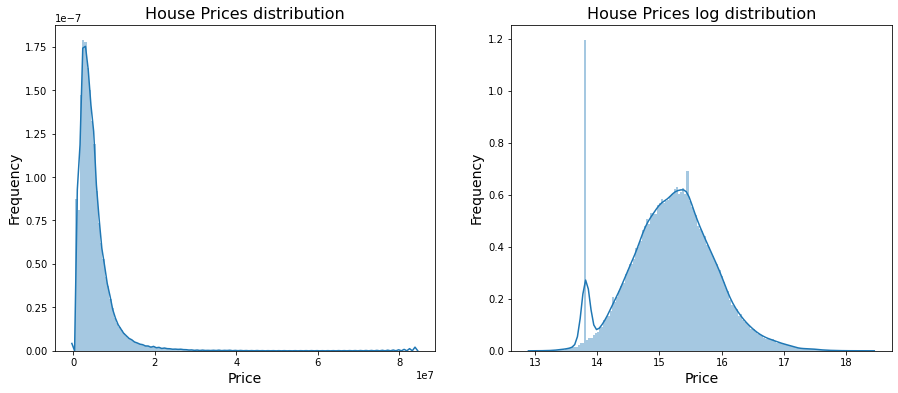

In [7]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 6))

sns.distplot(train['price'], bins=150, ax=ax1)
ax1.set_title('House Prices distribution', fontsize=16)
ax1.set_xlabel('Price', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)

sns.distplot(np.log(train['price']), bins=150, ax=ax2)
ax2.set_title('House Prices log distribution', fontsize=16)
ax2.set_xlabel('Price', fontsize=14)
ax2.set_ylabel('Frequency', fontsize=14)
plt.show()

#### Что интересного:
        В целом распределение несколько похоже на нормальное, но больше на Коши (в силу тяжелых хвостов). 
        Но самое интересное: Мы видим, что справа при логарифмировании на гистограмме при log(price)~=13.8 резко увеличивается кол-во обьектов. Это явно ненормально, учитывая распределение цен в целом.
        Если приблизить гистограмму достаточно сильно, можно будет примерно оценить значение log(price), при котором происходит взлет - 13.815510557964274. Если перевести это обратно, мы получим цену = 1 миллион рублей. 
        Эта цена нетипична для общего распределения цен и выглядит очень хорошей с эстетической точки зрения.
        Предположение: возможно это квартиры, для которых цена не была предоставлена и вследствие этого была заменена на вот такое вот число. В любом случае, это выбросы, поэтому их стоит удалить из общей выборки.
        Стоит поставить себе вопрос: Что делать, если они есть и в тесте? Как обрабатывать их?

In [8]:
bad_price = 13.815510557964274

#### Площадь квартиры точно будет являться важным фактором при предсказании цены. Построим гистограмму этого признака отдельно.

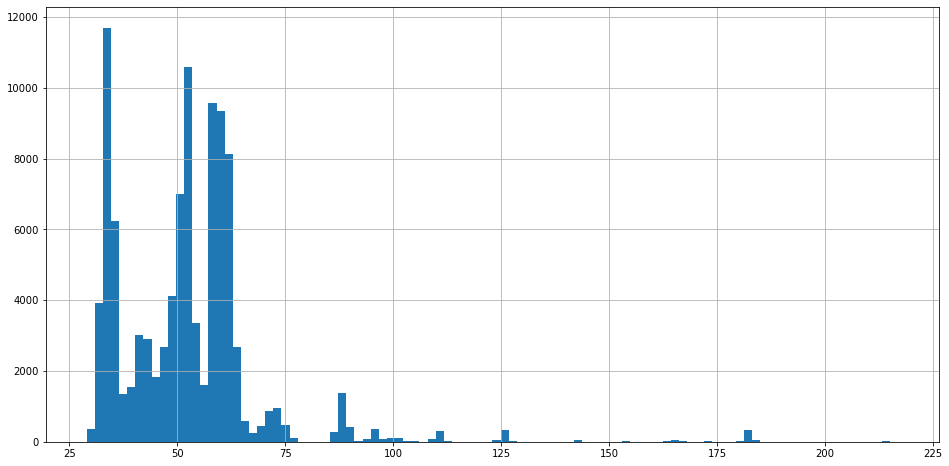

In [9]:
train.area.hist(bins=100, figsize=(16, 8))
plt.show()

#### Что интересного:
    В целом нельзя сказать чего-то конкретного на основе этого распределения. Видно, что практически все квартиры имеют площадь в диапазоне [27; 70] квадратных метров. Но есть и огромные квартиры, хоть их и мало.

#### Построим распределения для признаков с небольшим числом значений (<=25), не включая kw

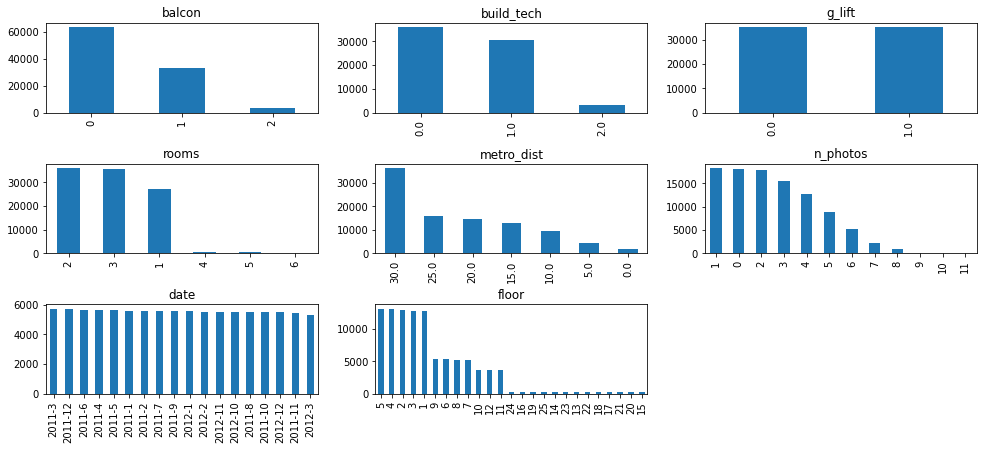

In [10]:
categorical_features = ['balcon', 'build_tech', 'g_lift', 'rooms', 'metro_dist',
                        'n_photos', 'date', 'floor']

fig, axes = plt.subplots(3, 3)
fig.delaxes(axes[2, 2])
fig.set_size_inches(14, 6)
fig.tight_layout(pad=2.0, h_pad=3.0)

train_plot = train.copy().dropna()

for i in range(len(categorical_features)):
    train[categorical_features[i]].value_counts().plot.bar(ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(categorical_features[i])

#### Что интересного:
    В целом, довольно очевидные с точки зрения логики графики. Пока ничего конкретного сказать нельзя, за исключением:
    rooms: Кол-во комнат в 90%+ случаев не превышает 3;
    metro_dist: Очень много квартир находятся далеко от метро;
    date: на каждую дату имеется почти одинаковое количество квартир;
    floor: квартир, находящихся на высоких этажах (13+) очень мало.

#### Отдельно посмотрим распределение всех kw

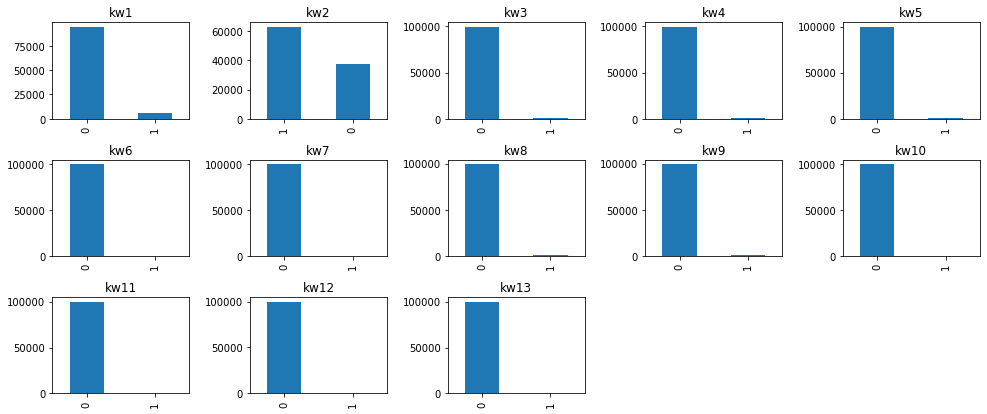

In [11]:
kw_features = [f'kw{str(i)}' for i in range(1, 14)]

fig, axes = plt.subplots(3, 5, squeeze=True)
fig.delaxes(axes[2][3]), fig.delaxes(axes[2][4])
fig.set_size_inches(14, 6)
fig.tight_layout(pad=2.0)

for i in range(len(kw_features)):
    train[kw_features[i]].value_counts().plot.bar(ax=axes[i // 5, i % 5])
    axes[i // 5, i % 5].set_title(kw_features[i])

In [12]:
# Признаки kw3-13 в ~99% случаев принимают значения 0. Может ли быть так, что какие-то из них одновременно равны 1?
# Если это так, то сумма этих kw на каком-то обьекте будет > 1.
train[kw_features[2:]].sum(axis=1).unique()

array([0, 1])

#### Что интересного:
    Признаки kw3-13 никогда вместе не равны 1, при этом у 99%+ обьектов из выборки kw3-13 = 0. Поэтому думаю, можно обьединить их в один признак, равный 1, если один из kw3-13 равен 1, иначе 0.

In [13]:
train.columns[0:12]

Index(['date', 'street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon',
       'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2'],
      dtype='object')

#### Построим scatter plot'ы для целевой переменной и каждого признака (без kw3-13).

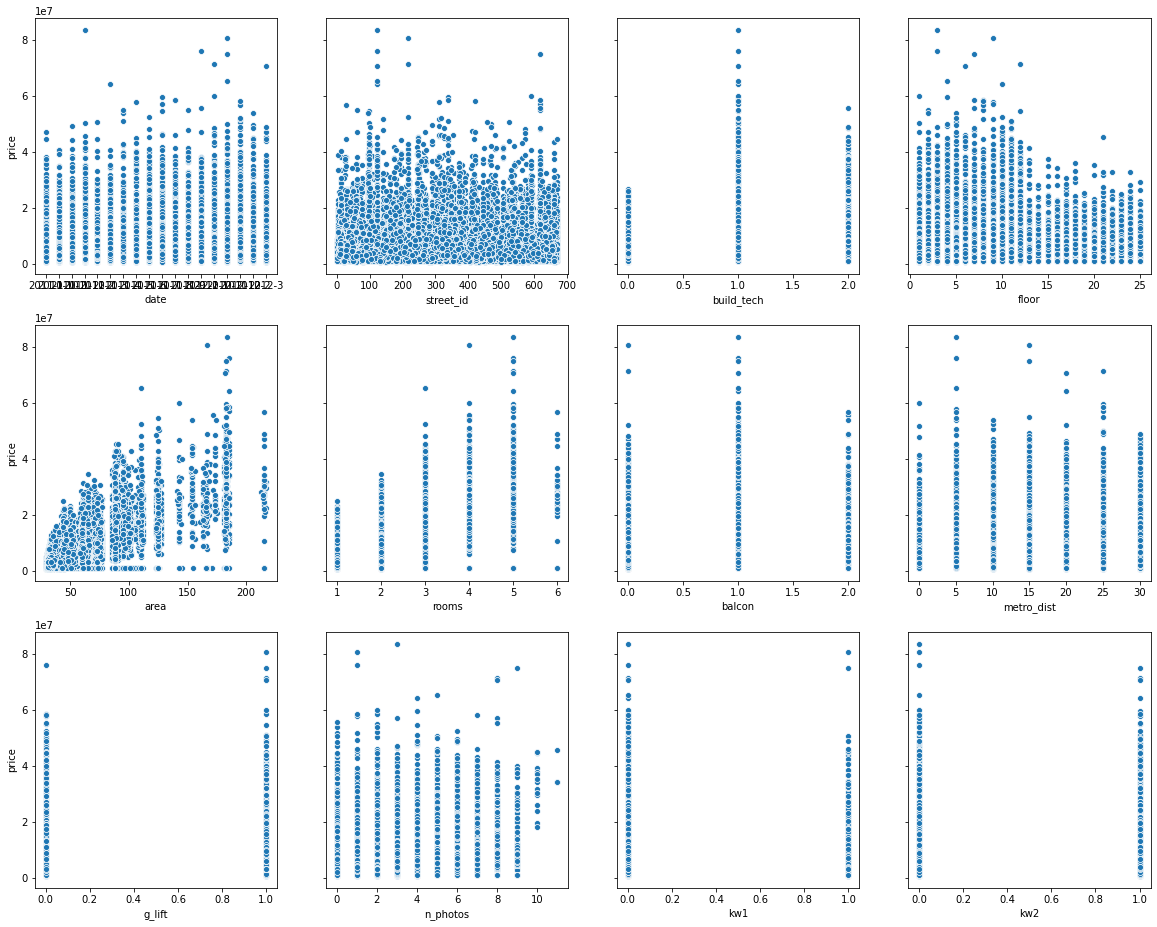

In [14]:
fig, axes = plt.subplots(3, 4, figsize=(20, 16), sharey=True)
for i in range(0, 12):
    sns.scatterplot(train.columns[i], 'price', ax=axes[i // 4, i % 4],
                    data=train)

            Учитывая достаточно большой масштаб целевой переменной и размер выборки, даже достаточно весомая разница порядка сотни тысяч на графиках может быть не совсем заметна. Поэтому отрисуем их еще раз, перед этим логарифмировав цену.

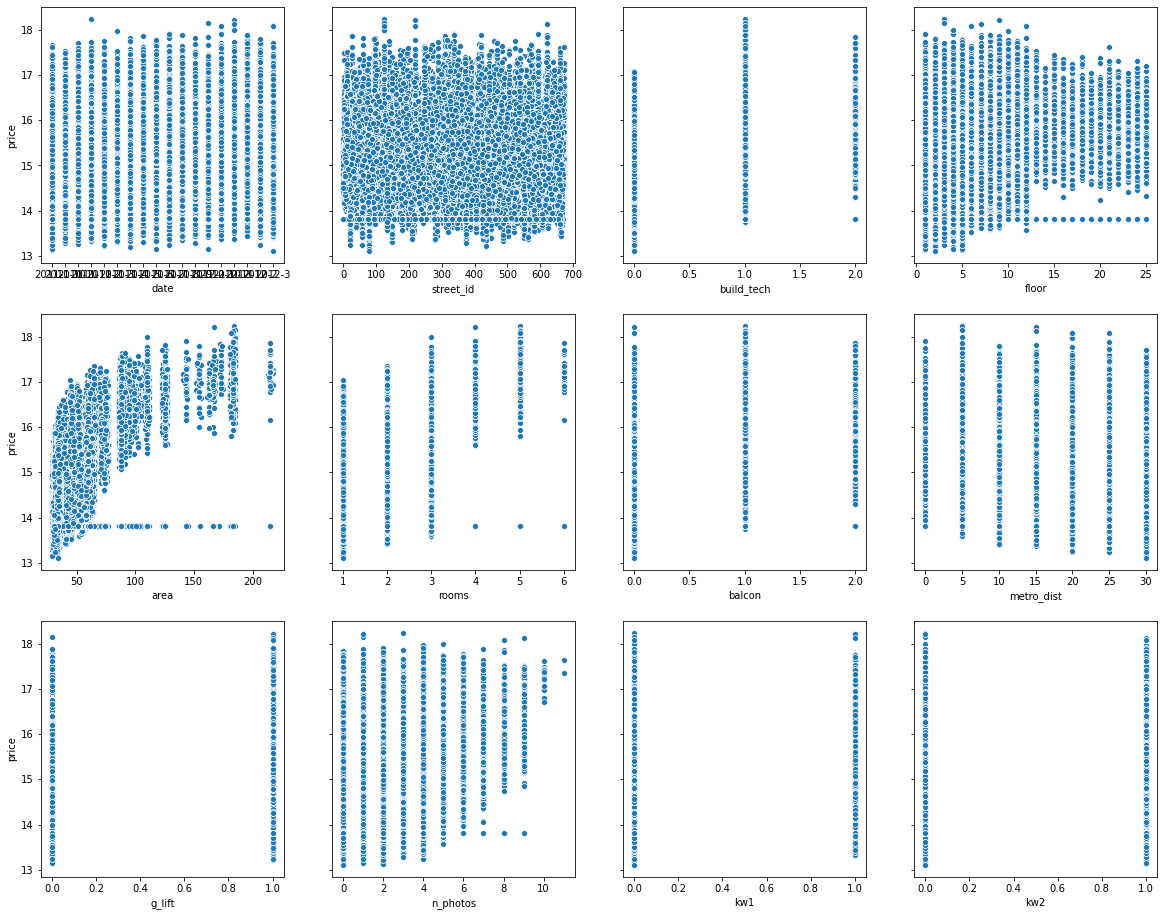

In [15]:
log_train = train.copy()
log_train['price'] = np.log(log_train['price'])

fig, axes = plt.subplots(3, 4, figsize=(20, 16), sharey=True)
for i in range(0, 12):
    sns.scatterplot(train.columns[i], 'price', ax=axes[i // 4, i % 4],
                    data=log_train)

#### Что интересного:
    Благодаря логарифмированию, мы можем видеть зависимости, которые на обычных scatterplot'ах распознать было довольно сложно. Особенно это видно для признака floor: в 1 случае казалось, что квартиры на высоких этажах в среднем стоят дешевле, чем квартиры на низких, однако это не так.
    area: Видно, что с увеличением этого признака цены квартир также сдвигаются вверх.
    rooms: Чем больше в квартире комнат, тем выше цены. С увеличением числа комнат начинает появлятся все больше дорогих квартир.
    balcon: Аналогично с rooms, только не так явно.
    n_photos: этот признак (все-таки это кол-во фотографий квартиры?) также при возрастании сдвигает цену квартир вверх.
    floor: На графике видно, что на некоторых этажах происходят резкие скачки цены. Из этих скачков можно сделать вполне логичное разделение квартир на "нижние", "средние" и "высокие". Найдем этажи, на которых эти скачки происходят (на графике отчетливо можно видеть 2 скачка, первый где-то на 6 этаже, а второй, предположительно, на 12-13).

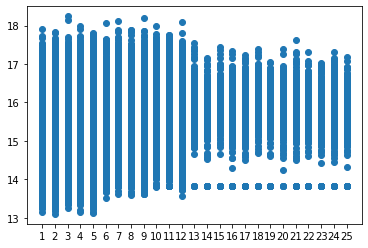

In [16]:
ax = plt.subplot(111)
ax.set_xticks(np.arange(1, 26))
ax.scatter(train['floor'], log_train['price'])

    Видно, что первый скачок происходит на 6 этаже, а второй, более сильный, на 13. 
    Таким образом, можно сделать следующее разделение:
        I. Нижние квартиры: этажи с 1 по 5 включительно;
        II. Средние квартиры: этажи с 6 по 12 включительно;
        III. Верхние квартиры: этажи с 13 по 25 включительно;
    Посмотрим распределение цен для каждой из этих групп.

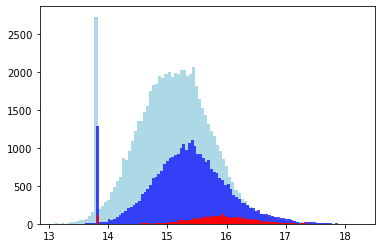

In [17]:
log_train.loc[np.array(log_train['floor'] >= 1) & np.array(log_train['floor'] <= 5), 'height'] = 1 
log_train.loc[np.array(log_train['floor'] >= 6) & np.array(log_train['floor'] <= 12), 'height'] = 2
log_train.loc[np.array(log_train['floor'] >= 13) & np.array(log_train['floor'] <= 25), 'height'] = 3

plt.hist(log_train[log_train['height'] == 1]['price'], bins=100, color='lightblue')
plt.hist(log_train[log_train['height'] == 2]['price'], bins=100, color='blue', alpha=0.7)
plt.hist(log_train[log_train['height'] == 3]['price'], bins=100, color='red', alpha=1)
plt.show()

    Действительно, виден сдвиг графиков в сторону увеличения цены при увеличении "высоты" квартиры.

### Посчитаем попарные корреляции признаков.
    Большинство признаков здесь целочисленные, скорее даже категориальные, но все равно посчитаем для них корреляции, вдруг что-то да выскочит.

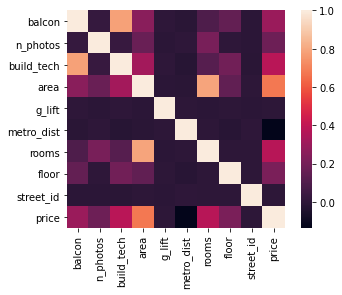

In [18]:
sns.heatmap(train[list(set(train.columns[0:10])) + ['price']].corr(), square=True)

In [19]:
abs(train[list(set(train.columns[0:10])) + ['price']].corr()['price']).sort_values(ascending=False)[1:]

area          0.680179
build_tech    0.383037
rooms         0.375128
balcon        0.303992
floor         0.218445
n_photos      0.181718
metro_dist    0.134858
street_id     0.000492
g_lift        0.000469
Name: price, dtype: float64

In [20]:
print('correlation between area and rooms:\n', train[['area', 'rooms']].corr().iloc[0, 1],\
      '\ncorrelation between balcon and build_tech:\n', train[['balcon', 'build_tech']].corr().iloc[0, 1])

correlation between area and rooms:
 0.7941890138274211 
correlation between balcon and build_tech:
 0.7864566828001731


#### Что интересного:
    1. Видна довольно высокая линейная зависимость цены от area. Также несколько остальных признаков также имеют неплохую корреляцию с целевой переменной.
    2. Видна сильная линейная зависимость между area и кол-вом комнат. Из этого можно сделать вывод, что area точно означает площадь квартиры, а не район, в котором она находится (такое предположение было). 
    3. Видна сильная линейная зависимость между balcon и build_tech. Из этого можно сделать предположение что build_tech означает тип квартиры. !!! Также мы знаем, что у порядка 30% обьектов отсутствует значение build_tech. Учитывая его сильную корреляцию с balcon, это еще один повод его удалить (хоть у него и неплохая корреляция с price).

### Поработаем с датой

In [21]:
train['date'].unique()

array(['2011-1', '2011-10', '2011-11', '2011-12', '2011-2', '2011-3',
       '2011-4', '2011-5', '2011-6', '2011-7', '2011-8', '2011-9',
       '2012-1', '2012-10', '2012-11', '2012-12', '2012-2', '2012-3'],
      dtype=object)

In [22]:
print("Квартир 2011 года:\n", train[train['date'].apply(lambda data: data.startswith('2011'))].shape[0],
      "\nКвартир 2012 года:\n", train[train['date'].apply(lambda data: data.startswith('2012'))].shape[0])

Квартир 2011 года:
 67065 
Квартир 2012 года:
 32935


    Видно, что большая часть квартир приходится на 2011 год. Остальные - на 2012. Посмотрим, отличаются ли цены на квартиры в зависимости от года продажи и, затем, в зависимости от месяца

#### Года

In [23]:
prices_2011 = train[train['date'].apply(lambda data: data.startswith('2011'))]['price']
prices_2012 = train[train['date'].apply(lambda data: data.startswith('2012'))]['price']

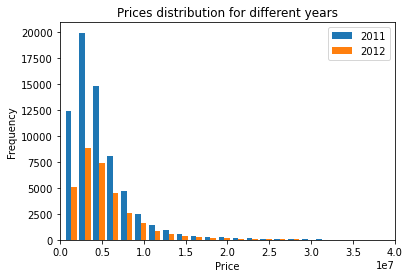

In [24]:
plt.hist([prices_2011, prices_2012], bins=50, label=['2011', '2012'])
plt.legend(loc='upper right')
plt.xlim(0, 4*1e7)
plt.title('Prices distribution for different years')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

    Особо ничего интересного. Распределения цен по годам очень похожи. Т.к. квартир на 2012 год в 2 раза меньше, оранжевые столбцы 2012 года составляют примерно половину соответствующих им синих.
    Хотя, если посмотреть на столбы, начиная с 3, то оранжевые столбцы чуть выше, чем половина синего столбца. Такое ощущение, что в 2012 году цены дороже? Проверим эту гипотезу.

In [25]:
def plot_timestamp(df):
    def make_data(x):
        return datetime.datetime.strptime(x, "%Y-%m")
    df['date'] = df['date'].map(make_data)
    
    timestamp = df.groupby(by='date')['price'].mean()
    timestamp.plot()
    plt.show()

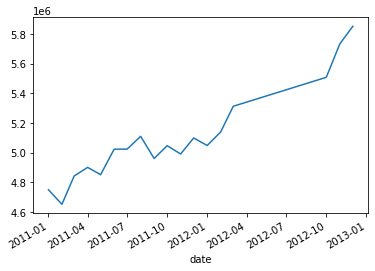

In [26]:
plot_timestamp(train)

    Что мы видим? между 2012-3 и 2012-10 произошел большой скачок средней цены за квартиру, который еще больше увеличился в 2012-11 и 2012-12.
    Это повод задуматься о том, что цены (хоть и с некоторыми падениями), но в целом растут.
    Видно, что за период 2011 года цены выросли, и в 2012 году эта тендеция продолжилась. И к концу 2012 года (т.к. в трейне у нас есть данные на конец 2012 года) цены выросли даже на более высокую величину, чем в 2011.
    (Забегая вперед): Оказывается, что в тесте даты продолжаются от трейна, то есть там учавствуют месяцы уже 2012 и 2013 годов.
    Т.к. у нас нет цен на 2013 год, стоит серьезно задуматься над тем, как прогнозировать этот рост цены для него.

#### Работа с NaN'ами
    build_tech: Как мы уже видели, у порядка 30% обьектов этот признак отсутствует, при этом корреляция между ним и balcon ~0.8. Поэтому выглядит целесообразным просто удалить его.
    (Update: удаление понижает скор, поэтому при построении модели он будет оставлен и заменен просто на -1. Это будет означать, что технология постройки неизвестна.);
    g_lift: Принимает всего два значения и также примерно у ~30% обьектов этот признак отсутствует. Если предположить, что это наличие/отсутствие лифта в доме, в котором расположена квартира, адекватным решением будет поставить отсутствующее значение в 0 - лифта нет.
    metro_dist: расстояние до метро. 5% пропусков. Ставить расстояние равным 0 точно нельзя - тогда будет считаться, что метро буквально у квартиры, что явно должно влиять на цену (мы уже видели на scatterplot'е, что чем меньше metro_dist, тем в среднем дороже квартиры. Это особенно видно для metro_dist = 0). Среднее значение ставить тоже не очень хорошо. Неплохим вариантом будет назначить NaN'ы в виде большого числа - например 999. Если интерпретировать NaN'ы, как слишком большое расстояние от квартиры до ближайшего метро, то это отличная замена.

### Что не было сделано
    По хорошему надо было бы исследовать различие между признаками в разные годы, месяцы, еще какие-то временные промежутки. Поскольку мы знаем, что цена растет, можно выдвинуть предположение, что признаки также разные.
    Однако это было проверено эмпирически при помощи тренировки модели, т.к. если бы это действительно было, модель бы это заметила. Также, хоть в этом ноутбуке это не отражено, были построены графики некоторых наиболее значимых признаков (например, area) в зависимости от года. Распределения были практически идентичными.